In [93]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import xlsxwriter

In [94]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# RETRIEVING AND BASIC FORMATTING EXCEL FILES

## Retrieving the .xlsx files
Find the directory where the excel files are living. 

Then **'excel_files'** will report what lives inside the folder. 

Note: Any additional excel files you want analysed will need to be put into the same location as **'directory'.**

In [95]:
directory = r"\\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content\X_Data\Data - ARR\_CONSOLIDATED v3"
files = os.listdir(directory)
excel_files = []
for f in files:
    if ".xlsx" in f:
        excel_files.append(f)
excel_files

['20170706 12_20 Family Types Log.xlsx',
 '20170706 12_20 FamilyCategory Log.xlsx',
 '20170706 12_20 FamilySubCategory Log.xlsx',
 '20170706 12_20 Host Families Log.xlsx',
 '20170706 12_20 Materials Log.xlsx',
 '20170706 12_20 Nested Families Log.xlsx',
 '20170706 12_20 OmniClass Log.xlsx',
 '20170706 12_20 Parameters Log.xlsx',
 '20170706 12_20 ParameterValuesByTypes Log.xlsx',
 '20170706 12_20 Reference Planes Log.xlsx',
 '20170706 12_20 Units Log.xlsx',
 'BVN Shared Parameters List.xlsx',
 '~$BVN Shared Parameters List.xlsx']

## xlsx. key and values

Use <b>keys</b> to pair each key with each excel file in <b>excel_files</b>. This is so that you don't have to type the long file name everytime you need to call it in the rest of the code. 

<b>file_dict</b> will tell you which excel file is paired with each key.

In [96]:
keys = [
        "FamilyTypes",
        "FamilyCategory",
        "FamilySubCategory",
        "HostFamilies",
        "Materials",
        "NestedFamilies",
        "Omniclass",
        "Parameters",
        "ParameterValuesByTypes",
        "ReferencePlanes",
        "Units",
        "BVNSharedParametersList"
        
       ]

file_dict = {key: value for (key, value) in zip(keys, excel_files)}
file_dict

{'BVNSharedParametersList': 'BVN Shared Parameters List.xlsx',
 'FamilyCategory': '20170706 12_20 FamilyCategory Log.xlsx',
 'FamilySubCategory': '20170706 12_20 FamilySubCategory Log.xlsx',
 'FamilyTypes': '20170706 12_20 Family Types Log.xlsx',
 'HostFamilies': '20170706 12_20 Host Families Log.xlsx',
 'Materials': '20170706 12_20 Materials Log.xlsx',
 'NestedFamilies': '20170706 12_20 Nested Families Log.xlsx',
 'Omniclass': '20170706 12_20 OmniClass Log.xlsx',
 'ParameterValuesByTypes': '20170706 12_20 ParameterValuesByTypes Log.xlsx',
 'Parameters': '20170706 12_20 Parameters Log.xlsx',
 'ReferencePlanes': '20170706 12_20 Reference Planes Log.xlsx',
 'Units': '20170706 12_20 Units Log.xlsx'}

## FUNCTIONS TO FORMAT EXCEL FILES

### Removing the common file path characters from original family file path name

The example file path below is very long. In order to cut the fat out of the long file path, the common characters from each file path is removed. 

\\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content\Windows\Double Hung\Double Hung_3 Panel.rfa

Therefore, the start of the file path <b>\\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content</b> is removed in every spreadsheet.

### Removing the rfa. name from FamilyFilePath.

In the excel files, the family name (.rfa) is part of the FamilyFilePath column.

e.g. \\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content\Windows\Special\<u>Window Lancet_basic.rfa</u>

### Determines whether the family is an .rfa or from a .txt catalogue file.

<b> remove_rfaName</b> removes the family name from the FamilyFilePath column. This allows us to find things such as the count of how many families there are within a particular master content folder. It splits the <b>full_filepath</b> path by each \ .

<b>joined_again</b> will join the file path back through the \ except for the last one. The new file path is appended on a FamilyFilePath column.

### Determines whether the family is an .rfa or from a .txt catalogue file.
<b>getFileType</b> removes the last three characters from the FamilyFilePath.

<b>stripFileType</b> removes the last four characters (including the '.') from the FamilyName.

In [97]:
commonPartofFilePath = len(r'\\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content')
print commonPartofFilePath
def stripCommonPath(row):
        return row.FamilyFilePath[commonPartofFilePath+1:]
    
def remove_rfaName(row):
    full_filepath = row.FamilyFilePath
    split = full_filepath.split("\\")[:-1]
    joined_again = ("\\".join(split))
    return  joined_again

def getFileType(row):
    return row.FamilyFilePath[-3:]

def stripFileType(row):
    return row.FamilyName[:-4]

95


# PARAMETERS

**p_path** and **p** reads from the ParameterValuesByTypes excel file.

In [98]:
p_path = os.path.join(directory, file_dict["Parameters"])
p = pd.read_excel(p_path)

p["FamilyFilePath"] = p.apply(remove_rfaName, axis=1)
p["FamilyFilePath"] = p.apply(stripCommonPath, axis=1)
p["FamilyName"] = p.apply(stripFileType, axis=1)

p.head()

,FamilyFilePath,FamilyName,ParameterName,ParameterGUID,ParameterIsDeterminedByFormula,ParameterIsInstance,ParameterIsReporting,ParameterStorageType,ParameterAction,ParameterActionParameter
0,Windows\Structural,Window_Square Opening_WIN,Analytic Construction,NaN,False,False,False,String,None,NaN
1,Windows\Structural,Window_Square Opening_WIN,Assembly Code,NaN,False,False,False,String,None,NaN
2,Windows\Structural,Window_Square Opening_WIN,Construction Type,NaN,False,False,False,String,None,NaN
3,Windows\Structural,Window_Square Opening_WIN,Cost,NaN,False,False,False,Double,None,NaN
4,Windows\Structural,Window_Square Opening_WIN,Description,NaN,False,False,False,String,None,NaN


## Number of Parameters of Families

In [50]:
grouped_parameters = p.groupby("FamilyName").agg(['count'])

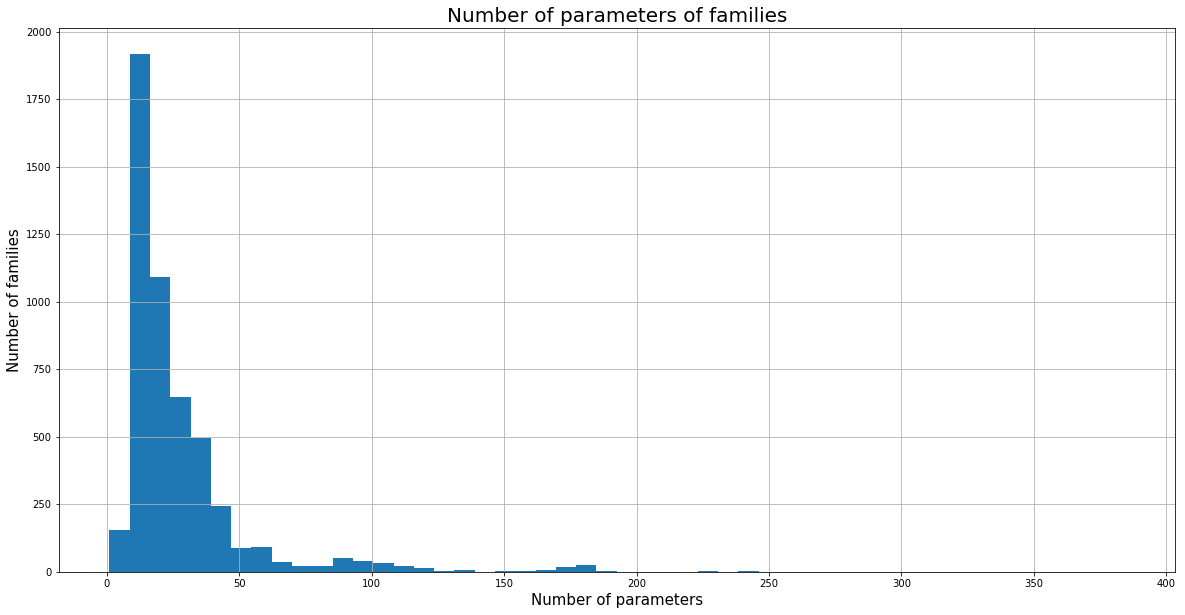

In [51]:
grouped_parameters["ParameterName"].hist(bins=50);
plt.title("Number of parameters of families", fontsize=20)
plt.xlabel("Number of parameters", fontsize=15)
plt.ylabel("Number of families", fontsize=15)
plt.show()

## Numbers of Parameters of Families (High Offenders)

In [52]:
param_counts = grouped_parameters["ParameterName"]
param_counts[param_counts["count"]>100]

,count
FamilyName,
5 Bay Window,104
6 Bay Window,112
6 Bay Window - Non Hosted,106
Accordion_Double_DOR,128
Accordion_Single_DOR,125
Base Cabinet_Corner_LShape_CAS,184
Base Cabinet_Dishwasher_CAS,161
Base Cabinet_Door with Drawer_CAS,171
Base Cabinet_Double_CAS,184


# SHARED PARAMETERS

## Checks to see if parameters in MC are part of BVN's shared parameter list

In [53]:
sp_BVN = ["Asset Number","Author","Building Name","Building Number","Copyright","Generic Room Sheet Reference","Grid Prefix","Line Length","Modified Issue","Project","Sorting Levels","Stage","Zone","Apartment_External Area","Area Actual vs Briefed","Area Actual vs Briefed%","Area Per Occupant","Area Type","Area_Colour_Bvn","Briefed Area","Required Area","Sp_Area_Designed","Sp_Circulation_Area","Sp_Comments","Sp_Department","Sp_Depth","Sp_Gfa_Factor","Sp_Material_Ceilings","Sp_Material_Walls","Sp_Net_Area","Sp_Per_Unit_Area","Sp_Total_Gfa_Area","Sp_Unique_Id","Sp_Units","Sp_Width","Bench_Material_Bvn","Bench_Thickness_Bvn","Benchtop Material","Benchtopfinish","Benchtopmaterial","Benchtopthickness","Carcasefinish","Carcasematerial","Carcass Material","Carcass_Material_Bvn","Carcess_Thickness_Bvn","Caseworkoveralldepth","Caseworkoverallheight","Caseworkoverallwidth","Cf_1","Cf_2","Depth_Bvn","Depth_Two_Bvn","Detailedcategory","Ff_1","Ff_2","FF_SPECIFIC_1","Frontpanel_Left_Material_Bvn","Frontpanel_Right_Material_Bvn","Frontpanel_Single_Material_Bvn","Function","Height_Bvn","Height_Skirting_Bvn","Height_Two_Bvn","Hfbs_Sub_Department","Itemcode","Itemdescription","Itemgroup","Kicker Material","Kickerfinish","Kickerheight","Kickermaterial","Link_Status","Mounted_Top_Bvn","Mounting_Height_Bvn","Mounting_Height_Centre_Bvn","Mounting_Height_Top_Bvn","Mounting_Height_Us_Bvn","Overall_Height_Bvn","Radius","rwcalc_Panel Offset off Base","Sub-Department","Thickness_Shelf","Thickness_Shelf","Wf_E_1","Wf_E_2","Wf_N_1","Wf_N_2","Wf_S_1","Wf_S_2","Wf_W_1","Wf_W_2","Width_Bvn","Width_Corner_Bvn","Width_Counter_Dda_Bvn","Width_Two_Bvn","Ceiling Acoustic Rating","Ceiling Finish","Ceiling Finish Colour","Ceiling_Height_Bvn","Sp_Ceiling_Height","Panel Height","Panel Width","Curtain Wall Window Type","Filled Region Area","As1428 Tolerance","Bolt Latch","Clear Opening","Closer","Core","Door Changed","Door Leaf Height","Door Leaf Thickness","Door Leaf Type","Door Panel Material","Door Remarks","Door Seals","Door Stop","Door Swing To (Room Name and Number)","Door Type Description","Door Type Number","Door Undercut","DoorProtection_PullType","DoorProtection_PushType","Double Rebate","Double Swing","Either Side Swing Away","Either Side Swing Towards","Electric Locking","Electromagnetic Hold Open","Finish on Pull Side","Finish on Push Side","Fire/Smoke Door","Frame Finish","Frame Profile","Frame Type","Front Swing Away","Front Swing Towards","Hardware Set","Head Details","Hinge Side Swing Away","Hinge Side Swing Towards","Jamb Details","Latch Side Swing Away","Latch Side Swing Towards","Leaf 1 Width","Leaf 2 Width","Leaf Height","Leaf Type","Lock/Latch","Meeting Stile Detail","Other Protection","Panel Type","Protection On Pull Side","Protection On Push Side","Pull Handle","Pull Side Finish Zone","Push Plates","Push Side Finish Zone","Reed Switch","Revision","Roller Catch","Sill Details","Special Hardware","Structural Opening","Structural Opening Height","Vision Panel Type","FF&E Code","FF&E Comments","FF&E Description","FF&E Group","FF&E Issue","FF&E Item","FF&E Supplier","Mass Per M","Acoustic Rating Rw/Rw+Ctr","Adaptable","Apartment Area","Apartment Number","Aspect","BVN_API","Construction","Depth","Filter_Object","Htmlink","Id_Detail","ID_Instance","ID_Type","Id_Url","ID_User","Length","Natspec Section Code","Natural Cross Ventilation","Natural Kitchen Ventilation","Number Of Bedrooms","Package","Radius","Reference","Revision","Revision Comments","SEPP 65 Solar Access Min 1.75Hrs","SEPP65_Cross Ventilation","SEPP65_Solar Access","SEPP65_South Facing","Solar Access Private Open Space_Min 3 Hrs","Solar Access_Min 2 Hrs","Solar Access_Min 3 Hrs","South Facing","Spec Description","Strata Lot Area","Strata Lot Number","Supplier","Supplier_Address","Supplier_Name","Supplier_Phone","Test Adaptable","Volume","Width","Carpark Allocation","No. of Parks","Parking_Clearance_Height","Tree Status","Cw Connection","Hw Connection","Mounting Height","Vent Connection","Waste Connection","Balcony Area","Balcony Compliance","Briefed Number of Rooms","Department Code","Department_BVN","RDS_Code","RDS_Description","RDS_Discipline","Room Code","Room Name","Sp_Room_Name","Sp_Room_Number","View Fitness","Column Material","Foundation Material","Framing Material","Plumbing Material","SDMP Floor Finish","SDMP Room Name","Window Frame Material(Delete)","Member_Length","A3 Scale","Additional Info- Fourth Line","Base Name","Base Number","Client Project Number","Configured By","Consultant 01","Consultant 01 Details","Consultant 02","Consultant 02 Details","Consultant 03","Consultant 03 Details","Consultant 04","Consultant 04 Details","Consultant 05","Consultant 05 Details","Consultant 06","Consultant 06 Details","Consultant 07","Consultant 07 Details","Consultant 08","Consultant 08 Details","Consultant 09","Content","Discipline","Drawing Revision","Drawing Scale","Ext.","File Type","Graphic Scale","Issued to","Level","Level - Second Line","Modifiedissue","Nts","Original Model By","Project Manager","Project Manager'S Details","Project Name Phase 2","Project Phase","Project Status","Project Status Phase 2","Project Type","Revision Date","Revision Description","Revision Number","Scale Bar 1-1","Scale Bar 1-10","Scale Bar 1-100","Scale Bar 1-1000","Scale Bar 1-2","Scale Bar 1-20","Scale Bar 1-200","Scale Bar 1-2000","Scale Bar 1-250","Scale Bar 1-5","Scale Bar 1-50","Scale Bar 1-500","Scale Printed","Scale_1","Scale_2","Scale_3","Scalenumber1","Sequence Number","Sheet Prefix","Sheet Size","State","State Code","Tbc_Sheet 01","Tbc_Sheet 02","Unit Name","Unit Number","View","Acoustic Performance","Fire Performance","Fire Rating","Lining_'Opposite Side'","Lining_'Placement Side'","Partition Code","Partition System Build-up","Partition System Manufacturer's Code","Thermal Value","Frame Width","Glazing","Glazing Material","Glazing Type","Material Sash Glazing","Material Window Frame","Mullion Height","Offset From Exterior Face","Suite Thickness","Window Blind Type","Window Jockey Sash","Window Louvre","Window Performance Type","Window Shade Centre","Window Shade Left","Window Shade Right","Window Shade Top","Windowframefinish","Windowframematerial","Windowframetype","Windowglazingtype","Windowheadheight","Windowoverallframeheight","Windowoverallframewidth","01_Lot Number","02_Lot Number","03_Lot Number","04_Lot Number","05_Lot Number","06_Lot Number","07_Lot Number","08_Lot Number","09_Lot Number","10_Lot Number","11_Lot Number","12_Lot Number","13_Lot Number","14_Lot Number","15_Lot Number","16_Lot Number","Strata Area","Cb Classification","Cb Code 1","Cb Description","Cb Group","Cdeb_Doorid","Cdeb_Rminstid","Cdeb_Status","article_id","bim id","colour","dRofus Id","dRofus Item name","dRofus Item no","i-depth","i-height","i-length","item name","item number","main group name","main group number","name on drawing","occurrence_id","room function number","room number","room_id","sub group name","sub group number","t-depth","t-height","t-length","Functional Location: Base/ Component - Name","Functional Location: Building  - Name","Functional Location: Precinct / Unit - Name","Name and Numbers: Room ID","Name and Numbers: Room Name","Room Function Number","Acoustic Rating Rw","Adapt_Text","rwcalc_Swappable","Ignore for Sefaira","Shading for Sefaira","Area_Briefed","drofus_id","drofus_occurrence_id","Functional Location: Apartment - Number","Functional_Group","HFBSCode","ItemCode","ItemDescription","ItemGroup","model_name_drofus","Responsibility","Room_Label","Subdepartment","To be modelled","UniqueID"]

In [54]:
def is_legit_param(row):
    return row.ParameterName in sp_BVN

p["BVNparam"] = p.apply(is_legit_param, axis=1)

p.drop(["ParameterGUID", "ParameterIsDeterminedByFormula", "ParameterIsInstance", "ParameterIsReporting", "ParameterStorageType", "ParameterAction", "ParameterActionParameter"],axis=1,inplace=True)

p.head(5)

,FamilyFilePath,FamilyName,ParameterName,BVNparam
0,Windows\Structural,Window_Square Opening_WIN,Analytic Construction,False
1,Windows\Structural,Window_Square Opening_WIN,Assembly Code,False
2,Windows\Structural,Window_Square Opening_WIN,Construction Type,False
3,Windows\Structural,Window_Square Opening_WIN,Cost,False
4,Windows\Structural,Window_Square Opening_WIN,Description,False


## WRITING TO EXCEL

writer = pd.ExcelWriter('sample.xlsx', engine='xlsxwriter')

p.to_excel(writer, sheet_name='Sheet1')
writer.save()

## Number of parameters that are using BVN SP vs non-SP

In [55]:
using_shared_param = p.groupby("BVNparam").agg(["count"])

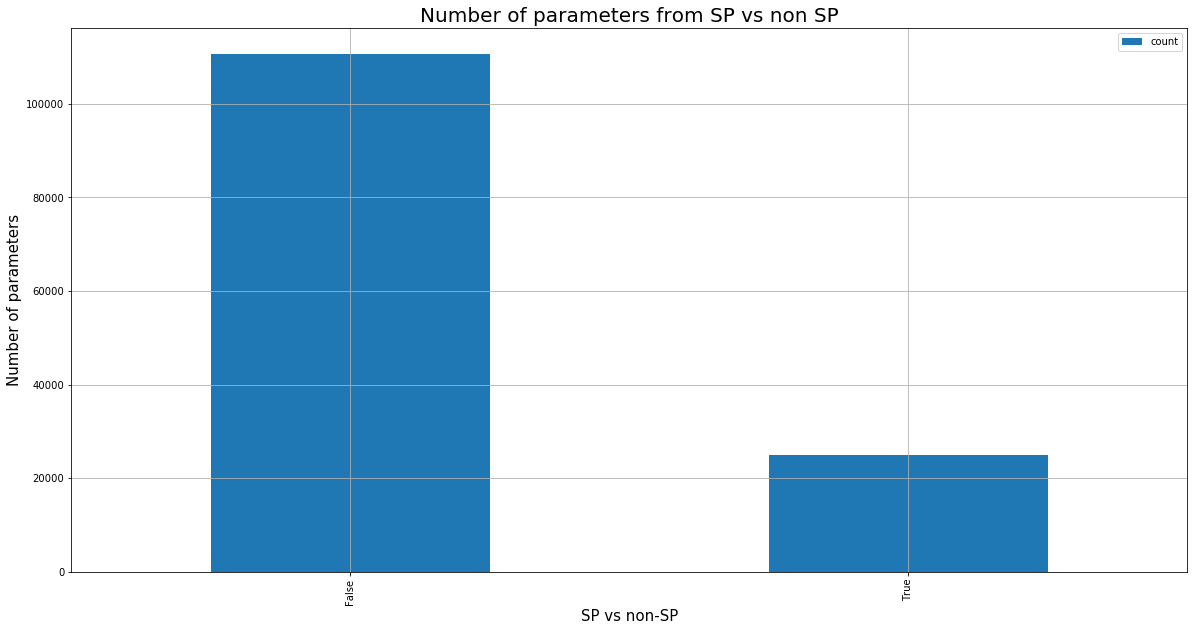

In [56]:
using_shared_param["FamilyName"].plot(kind="bar", grid=True);
plt.title("Number of parameters from SP vs non SP", fontsize=20)
plt.xlabel("SP vs non-SP", fontsize=15)
plt.ylabel("Number of parameters", fontsize=15)
plt.show()

## Families that are using BVN Shared Parameters

In [57]:
nameAndSp = p[["FamilyName", "ParameterName", "BVNparam"]]

#nameAndSp.head()

In [58]:
legit_param = nameAndSp[nameAndSp.BVNparam==True]

print "Number of non-BVN subcategories:", legit_param.shape

legit_param.head(10)

Number of non-BVN subcategories: (24991, 3)


,FamilyName,ParameterName,BVNparam
20,Window_Square Opening_WIN,Width,True
32,Window_Round Opening_WIN,Radius,True
43,Window_Round Opening_WIN,Width,True
71,Window Round_basic,Width,True
100,Window Lancet_basic,Width,True
128,Window Arched Top_basic,Width,True
137,Skylight_Velux_FCM_WIN,Frame Width,True
158,Skylight_Velux_FCM_WIN,Width,True
165,Skylight_Operable_WIN,Glazing,True
166,Skylight_Operable_WIN,Glazing Material,True


In [59]:
legit_param.ParameterName.unique()

array([u'Width', u'Radius', u'Frame Width', u'Glazing',
       u'Glazing Material', u'Mullion Height', u'Window Blind Type',
       u'Window Jockey Sash', u'Window Louvre', u'Window Shade Centre',
       u'Window Shade Left', u'Window Shade Right', u'Window Shade Top',
       u'Windowframefinish', u'Windowframematerial', u'Windowframetype',
       u'Windowglazingtype', u'Windowheadheight',
       u'Windowoverallframeheight', u'Windowoverallframewidth',
       u'Suite Thickness', u'Depth', u'Door Undercut',
       u'Offset From Exterior Face', u'Panel Height', u'Author',
       u'Copyright', u'Panel Width', u'Material Window Frame',
       u'Bolt Latch', u'Clear Opening', u'Closer', u'Core',
       u'Door Leaf Height', u'Door Leaf Thickness', u'Door Leaf Type',
       u'Door Seals', u'Door Stop', u'Either Side Swing Away',
       u'Either Side Swing Towards', u'Electric Locking',
       u'Electromagnetic Hold Open', u'Fire Rating', u'Fire/Smoke Door',
       u'Frame Profile', u'Front Sw

## No. of SP parameters vs non-BVN SP parameters of each family

In [60]:
check_for_sp = nameAndSp.groupby(["FamilyName", "BVNparam"]).agg(["count"])

check_for_sp.head()

ParameterName
                                           count
FamilyName                BVNparam              
1 Bay Window              False               58
                          True                10
1 Bay Window - Non Hosted False               54
                          True                 6
10P_Perimeter_Bench_FYS   False               17

## Filters shared parameters that aren't being used in the Master Content (*dead shared parameters*)

In [61]:
spBVN = set(sp_BVN)
p_All = set(list(nameAndSp.ParameterName))
dead_param = spBVN - p_All

dead_param

{'01_Lot Number',
 '02_Lot Number',
 '03_Lot Number',
 '04_Lot Number',
 '05_Lot Number',
 '06_Lot Number',
 '07_Lot Number',
 '08_Lot Number',
 '09_Lot Number',
 '10_Lot Number',
 '11_Lot Number',
 '12_Lot Number',
 '13_Lot Number',
 '14_Lot Number',
 '15_Lot Number',
 '16_Lot Number',
 'A3 Scale',
 'Acoustic Performance',
 'Acoustic Rating Rw',
 'Acoustic Rating Rw/Rw+Ctr',
 'Adapt_Text',
 'Adaptable',
 'Additional Info- Fourth Line',
 'Apartment Area',
 'Apartment Number',
 'Apartment_External Area',
 'Area Actual vs Briefed',
 'Area Actual vs Briefed%',
 'Area Per Occupant',
 'Area Type',
 'Area_Briefed',
 'Aspect',
 'BVN_API',
 'Balcony Area',
 'Balcony Compliance',
 'Base Name',
 'Base Number',
 'Briefed Number of Rooms',
 'Building Number',
 'Carpark Allocation',
 'Ceiling Acoustic Rating',
 'Ceiling Finish',
 'Ceiling Finish Colour',
 'Client Project Number',
 'Configured By',
 'Construction',
 'Consultant 01',
 'Consultant 01 Details',
 'Consultant 02',
 'Consultant 02 Details

## PROJECT SHARED PARAMETERS

In [105]:
proj_SP_in_template = ['_SPEC_WILKHAHN_ANSI/BIFMA_STANDARDS','_SPEC_WILKHAHN_DIN_EN_STANDARDS','_SPEC_WILKHAHN_FURNTECH-AFRDI_BLUE_TICK','_SPEC_WILKHAHN_FURNTECH-AFRDI_GREEN_TICK','_SPEC_WILKHAHN_GS_SYMBOL','_SPEC_WILKHAHN_Model','_SPEC_WILKHAHN_NPR_STANDARDS','_SPEC_WILKHAHN_Part_Number','_SPEC_WILKHAHN_Table_Length','_SPEC_WILKHAHN_Table_Width','_SPEC_WILKHAHN_URL','_SPEC_WILKHAHN_Version','_WILKHAHN Table Height','_WILKHAHN Table Length','_WILKHAHN Table Width','A3 Scale','Acoustic Performance','Acoustic Rating Rw','Adaptable','Additional Info- Fourth Line','Area Colour','Area_Colour_Bvn','Armpad Finish','AS1428 Tolerance','AS1482 Tolerance','Asset Number','Author','Back Finish','Balcony Area','Bars','Base Finish','Base Price','Bench_Material_Bvn','Bench_Thickness_Bvn','Benchtop Material','Benchtopfinish','Benchtopmaterial','Benchtopthickness','Bolt Latch','Briefed Area','Building Name','BVN Alphabet','Carcase Offset off Wall','Carcasefinish','Carcasematerial','Carcass Material','Carcass_Material_Bvn','Carcess_Thickness_Bvn','Caseworkoveralldepth','Caseworkoverallheight','Caseworkoverallwidth','Catalog','Catalog Code','Category Color','Cb Classification','Cb Code 1','Cb Description','Cb Group','Cdeb_Doorid','Cdeb_Rminstid','Cdeb_Status','Ceiling Acoustic Rating','Ceiling_Height_Bvn','Cf_1','Cf_2','CheckedBy_ANZRS','Clear Opening','Client Project Number','Closer','Column Length','Configured By','Configured By','Consultant 01','Consultant 01 Details','Consultant 02','Consultant 02 Details','Consultant 03','Consultant 03 Details','Consultant 04','Consultant 04 Details','Consultant 05','Consultant 05 Details','Copyright','Copyright','Copyright ©','Core','Core Name','CreatedBy_ANZRS','CreatedByURL_ANZRS','DAF_Created By_Username_t','DAF_Modified By_Username_t','DAF_Modified_Date_t','DAF_Modified_Date_t','DAF_Owned By_t','DAF_Revision number_t','Department_BVN','Depth_Bvn','Depth_Two_Bvn','Detailedcategory','Discipline','Door Grille/Undercut','Door Leaf Height','Door Leaf Thickness','Door Leaf Type','Door Leaf Width','Door Panel Height','Door Panel Thickness','Door Seals','Door Stop','Door Thickness','Door Thickness','Door Undercut','Double Rebate','Double Swing','Either Side Swing Away','Either Side Swing Towards','Electric Locking','Electromagnetic Hold Open','End Panel Side I Finish','End Panel Side II Finish','Expected Lifespan (Years)','Ext Frame_Offset EQUAL Host Wall thickness_i','FF&E Code','FF&E Comments','FF&E Description','FF&E Group','FF&E Issue','FF&E Item','FF&E Supplier','Ff_1','Ff_2','FF_SPECIFIC_1','Fire/Smoke Door','Flux Id','Frame Finish','Frame Overlaps Wall','Frame Profile','Frame to Match Wall Thickness','Front Panel Finish','Front Swing Away','Front Swing Towards','Frontpanel_Left_Material_Bvn','Frontpanel_Right_Material_Bvn','Frontpanel_Single_Material_Bvn','Generic Room Sheet Reference','Glazing','Glazing Material','Grade','Grid Prefix','Handle Height','Handle Offset','Head Details','Height_Bvn','Height_Skirting_Bvn','Height_Two_Bvn','Hfbs_Sub_Department','Hinge Side Swing Away','Hinge Side Swing Towards','HsbType','Ideate BIMLink','ItemCode','ItemCode_2','ItemDescription','ItemDescription_2','ItemGroup','ItemGroup_2','Jamb Details','Kicker Material','Kickerfinish','Kickerheight','Kickermaterial','Latch Side Swing Away','Latch Side Swing Towards','Leaf 1 Width','Leaf 2 Width','Leaf Height','Length','Level - Second Line','Lining_"Opposite Side"','Lining_"Placement Side"','Link_Status','Lock/Latch','Maintenance Schedule (Months)','Mass per m','Material Door Panel','Material Door Panel EXT','Material Door Panel INT','Material Frame','Material View Panel','Meeting Stile Detail','Modified Issue','ModifiedIssue','ModifiedIssue','Mounted_Top_Bvn','Mounting_Height_Bvn','Mounting_Height_Centre_Bvn','Mounting_Height_Top_Bvn','MOUNTING_HEIGHT_US_BVN','Mullion Height','No. of Parks','Original Model By','Other Protection','Overall_Height_Bvn','Package','Package Qty','Panel 1 Height','Panel 1 Width','Panel Height','Panel Width','Place in Structural Wall_i','Product Documentation Link','Project','Project Manager','Project Managers Details','Project Stage','Project Stage Code','Project Type','Protection on Pull Side','Protection on Push Side','Pull Handle','Pull Side Finish Zone','Push Plates','Push Side Finish Zone','Radius','Reed Switch','Revision','Roller Catch','Room Code','Room Colour','Room Name','rwcalc_Carcase Inside Width','rwcalc_Cupboard1 Height','rwcalc_Double Panel Width','rwcalc_Front Panel Visibility','rwcalc_Kickplate On','rwcalc_Kickplate Side I setback','rwcalc_Kickplate Side II setback','rwcalc_Kickplate Visibility','rwcalc_Panel Back Offset','rwcalc_Panel Inset Side I','rwcalc_Panel Inset Side II','rwcalc_Panel Offset off Base','rwcalc_Panel Thk Base','rwcalc_Panel Thk Side I','rwcalc_Panel Thk Side II','rwcalc_Panel Thk Top','rwcalc_Rail Offset','rwcalc_Rail1','rwcalc_Rail2','rwcalc_Real Panel Base Thk','rwcalc_Real Panel Side I Thk','rwcalc_Real Panel Side II Thk','rwcalc_Real Panel Top Thk','rwcalc_Shelf Depth','rwcalc_Shelf1','rwcalc_Shelf2','rwcalc_Shelf2 Height','rwcalc_Shelf3','rwcalc_Shelf3 Height','rwcalc_Shelf4','rwcalc_Shelf4 Height','rwcalc_Shelf5','rwcalc_Shelf5 Height','rwcalc_Shelf6','rwcalc_Shelf6 Height','rwcalc_Show Double Front Panel','rwcalc_Show Single Front Panel','rwcalc_Single Panel Width','rwcalc_Swappable','rwcalc_Symbolic Depth','Seat/Back Fabric','Security Rating (SR1 ,SR2)','SEPP 65 - Cross Ventilation','SEPP 65 - Solar Access','SEPP 65 - South Aspect','SEPP65 - Daylight Access','SEPP65_Cross Ventilation','SEPP65_Solar Access','SEPP65_South Facing','Side I Divider Panel','Side I End Panel','Side I End Panel Extend Back','Side I Kickplate Flush','Side I Shadow Margin','Side II Divider Panel','Side II End Panel','Side II End Panel Extend Back','Side II Kickplate Flush','Side II Shadow Margin','Sill Details','Small Panel Width','Sp_Area_Designed','Sp_Ceiling_Height','Sp_Circulation_Area','Sp_Comments','Sp_Department','Sp_Depth','Sp_Gfa_Factor','Sp_Material_Ceilings','Sp_Material_Walls','Sp_Net_Area','Sp_Per_Unit_Area','Sp_Room_Name','Sp_Room_Number','Sp_Total_Gfa_Area','Sp_Unique_Id','Sp_Units','Sp_Width','Special Hardware','SR Document GUID','SR View Calculation Settings','Stage','STF_Parking_BayAngle_t','STF_Parking_Disabled_YesNo_t','STF_Parking_Stripe_End_i','STF_Parking_Wheelstop_Depth_t','STF_Parking_Wheelstop_Height_t','STF_Parking_Wheelstop_Material_t','STF_Parking_Wheelstop_Position_t','STF_Parking_Wheelstop_Width_t','STF_Parking_Wheelstop_YesNo_t','STF_ParkingBay_Depth_t','STF_ParkingBay_Width_t','Structural Opening','Structural Opening Height','Sub Discipline Title - Third','Sub-Department','Swing Angle','Swing Angle','Thickness_Shelf','Unit Type','UTSEquipmentCategories','View','View Panel','View Panel Height','View Panel Inset','View Panel Sill','View Panel Width','Wall_Special Finish','Warranty Duration (Years)','Watermarked By','Wf_E_1','Wf_E_2','Wf_N_1','Wf_N_2','Wf_S_1','Wf_S_2','Wf_W_1','Wf_W_2','Width_Bvn','Width_Corner_Bvn','Width_Counter_Dda_Bvn','Width_Two_Bvn','Window Blind Type','Window Jockey Sash','Window Louvre','Window Shade Centre','Window Shade Left','Window Shade Right','Window Shade Top','Windowframefinish','Windowframematerial','Windowframetype','Windowglazingtype','Windowheadheight','Windowoverallframeheight','Windowoverallframewidth','WNF_Ext Frame_Offset_Internal Skin_i','WNF_Frame_Surround_Depth_t','WNF_Frame_Surround_Width_t','WNF_Overall Frame Height_t','WNF_Overall Frame Width_t','WNF_Panel_Main Fixed_Height_t','WNF_Panel_Main Fixed_Width_t','WNP_Schedule Filter_Louvre_t','Y-Tower Finish','Zone']

writer = pd.ExcelWriter('sample.xlsx', engine='xlsxwriter')

p.to_excel(writer, sheet_name='Sheet2')
writer.save()

## Filters for the dead project shared parameters in the template

In [106]:
deadParams = set(proj_SP_in_template)

evenDeader = deadParams - dead_param

evenDeader

{'AS1428 Tolerance',
 'AS1482 Tolerance',
 'Area Colour',
 'Area_Colour_Bvn',
 'Armpad Finish',
 'Asset Number',
 'Author',
 'BVN Alphabet',
 'Back Finish',
 'Bars',
 'Base Finish',
 'Base Price',
 'Bench_Material_Bvn',
 'Bench_Thickness_Bvn',
 'Benchtop Material',
 'Benchtopfinish',
 'Benchtopmaterial',
 'Benchtopthickness',
 'Bolt Latch',
 'Briefed Area',
 'Building Name',
 'Carcase Offset off Wall',
 'Carcasefinish',
 'Carcasematerial',
 'Carcass Material',
 'Carcass_Material_Bvn',
 'Carcess_Thickness_Bvn',
 'Caseworkoveralldepth',
 'Caseworkoverallheight',
 'Caseworkoverallwidth',
 'Catalog',
 'Catalog Code',
 'Category Color',
 'Cb Classification',
 'Cb Code 1',
 'Cb Description',
 'Cb Group',
 'Cdeb_Doorid',
 'Cdeb_Rminstid',
 'Cdeb_Status',
 'Ceiling_Height_Bvn',
 'Cf_1',
 'Cf_2',
 'CheckedBy_ANZRS',
 'Clear Opening',
 'Closer',
 'Column Length',
 'Copyright',
 'Copyright \xc2\xa9',
 'Core',
 'Core Name',
 'CreatedByURL_ANZRS',
 'CreatedBy_ANZRS',
 'DAF_Created By_Username_t',
 

In [107]:
# This tries to regex search for non ascii chars, BUT it doesn't work because the notebook isn't in unicode.
# however, the strings that cause the error are also the ones that we're looking for, so a try except does the job!
import re
nonUnicode = re.compile("[^\x00-\x7F]")

for p in list(p_All):
    try:
        p = str(p)
        if re.match(nonUnicode, p):
            print p
    except Exception as e:
        print p#, e

Primary Pump Flow  for 11Â°C
Copyright Â©
Plan swing_90Â°_i
Plan swing_30Â°_i
Plan swing_180Â°_Offset from wall_i
Plan swing_45Â°_i
DO NOT EDIT_Stacking_Plan rep_90Â°within opening_Visible_t
DO NOT EDIT_Stacking_Plan rep_90Â°beyond opening_Visible_i
DO NOT EDIT_Stacking_Plan rep_90Â°beyond opening_Visible_t
DO NOT EDIT_Stacking_Plan rep_180Â°_Visible_t
Plan swing_180Â°_i
WB STANDARD donâ€™t change
Plan swing_Double acting_90Â°_i


## REDUNDANT SP GROUPS

In [108]:
BVNsp_path = os.path.join(directory, file_dict["BVNSharedParametersList"])
BVNsp = pd.read_excel(BVNsp_path)

BVNsp.head()

,BVNSPGUID,BVNSPGROUP,BVNSPNAME,BVNSPDATATYPE
0,8f738848-048c-4060-a7f2-5a796e02cd25,01_Annotations,Asset Number,TEXT
1,94e25b89-289e-43d7-bba9-c1c23be396e9,01_Annotations,Author,TEXT
2,c1c2a86d-1d66-489f-aaa3-2a4f535b52ac,01_Annotations,Building Name,TEXT
3,07d1f39a-2bfe-4cf7-8366-d5d7c90ed129,01_Annotations,Building Number,TEXT
4,1d88889c-80d2-4aad-acbe-11076796e986,01_Annotations,Copyright,TEXT


In [111]:
nameAndgroup = BVNsp[["BVNSPGROUP", "BVNSPNAME"]]

nameAndgroup.head()

,BVNSPGROUP,BVNSPNAME
0,01_Annotations,Asset Number
1,01_Annotations,Author
2,01_Annotations,Building Name
3,01_Annotations,Building Number
4,01_Annotations,Copyright


In [113]:
BVNsp_group = nameAndgroup.groupby("BVNSPGROUP").agg(["count"])

BVNsp_group

,BVNSPNAME
,count
BVNSPGROUP,
01_Annotations,13
02_Areas,22
03_Casework & Joinery,61
04_Ceilings,5
05_Curtain Panels,2
06_Curtain Walls,1
07_Detail Items,1
08_Doors,62


In [114]:
BVN_SP_GROUPS = ["01_Annotations","02_Areas","03_Casework & Joinery","04_Ceilings","05_Curtain Panels","06_Curtain Walls","07_Detail Items","08_Doors","09_Electrical","10_Entourage","11_Floors","12_Furniture","13_Furniture Systems","14_Generic Models","15_Lighting","16_Mass","17_Mechanical ","18_Multiple Categories","19_Parking","20_Planting","21_Plumbing","22_Profiles","23_Railings","24_Rooms","25_Site","26_Speciality Equipment","27_Structural Columns","28_Structural Foundations","29_Structural Framing","30_Telephone Devices","31_Titleblocks","32_Walls","33_Windows","Codebook","Superseeded","Sefaira Shared Parameters","Exported Parameters","34_Marketing Drawings","drofus","drofus instance parameters"]

In [119]:
SP_GROUP_All = set(list(nameAndgroup.BVNSPGROUP))

### List of Dead Groups in BVN Shared Parameter List

In [121]:
deadGroups = set(BVN_SP_GROUPS)

deadGroupsinSp = deadGroups - SP_GROUP_All

deadGroupsinSp

{'09_Electrical',
 '10_Entourage',
 '11_Floors',
 '13_Furniture Systems',
 '14_Generic Models',
 '15_Lighting',
 '17_Mechanical ',
 '22_Profiles',
 '23_Railings',
 '25_Site',
 '28_Structural Foundations',
 '30_Telephone Devices'}